# หนังสือ Data Science วิเคราะห์การตลาด ด้วย Python
---
### บทที่ 10 ปัญหาจำแนกแบบหลายคลาส

#### ตัวอย่าง 10.1

In [11]:
# ตัวอย่าง 10.1
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import LinearSVC

segmentation = pd.read_csv('data/Segmentation.csv')

# Putting feature variable to X, Putting response variable to y
X = segmentation.drop(['CustomerID','Segment'],axis=1)
y = segmentation['Segment']

OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X) 
OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

array(['Fence Sitter', 'Potential', 'Fence Sitter', ..., 'Potential',
       'Potential', 'Potential'], dtype=object)

#### ตัวอย่าง 10.2

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

Fence Sitter       1.00      1.00      1.00       206
       Loyal       0.99      1.00      0.99        86
   Potential       1.00      0.99      1.00       318

    accuracy                           1.00       610
   macro avg       0.99      1.00      0.99       610
weighted avg       1.00      1.00      1.00       610



In [12]:
# ตัวอย่าง 10.2
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support 

segmentation = pd.read_csv('data/Segmentation.csv')
segmentation.head()
segmentation.info()
segmentation['Segment'].value_counts()

# Putting feature variable to X, Putting response variable to y 
X = segmentation.drop(['CustomerID','Segment'],axis=1) 
y = segmentation['Segment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                    random_state=123,
                                                    stratify=y) 

model = DecisionTreeClassifier()
clf = model.fit(X_train,y_train)

# Making predictions
y_pred=clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='macro') 
precision_recall_fscore_support(y_test, y_pred, average='micro')

# Printing classification report
print(classification_report(y_test, y_pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     3046 non-null   int64  
 1   Recency        3046 non-null   int64  
 2   Tenure         3046 non-null   int64  
 3   Frequency      3046 non-null   int64  
 4   MonetaryValue  3046 non-null   float64
 5   Segment        3046 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 142.9+ KB
              precision    recall  f1-score   support

Fence Sitter       1.00      1.00      1.00       206
       Loyal       0.99      1.00      0.99        86
   Potential       1.00      0.99      1.00       318

    accuracy                           1.00       610
   macro avg       0.99      1.00      0.99       610
weighted avg       1.00      1.00      1.00       610



#### กิจกรรม 10.1

              precision    recall  f1-score   support

      Retail       0.90      0.90      0.90      1001
    RoadShow       0.86      0.86      0.86      1000
 SocialMedia       0.93      0.91      0.92       998
   Televison       0.87      0.89      0.88      1001

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



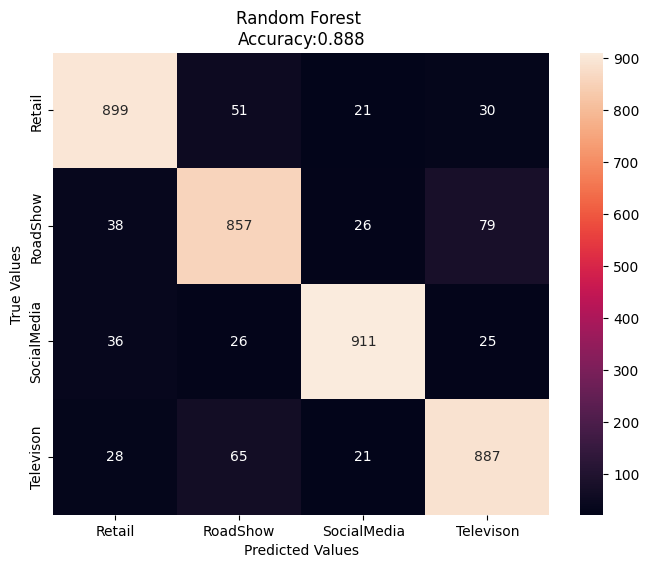

In [22]:
# กิจกรรม 10.1
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn import metrics 
from sklearn.metrics import precision_recall_fscore_support 
import matplotlib.pyplot as plt 
import seaborn as sns 

data= pd.read_csv(r'data/MarketingData.csv')
data.head()
data.shape
data.isnull().values.any()
data.describe()
data['Channel'].value_counts()

target = 'Channel'
X = data.drop(['Channel'],axis=1)
y=data[target]

X_train, X_test, y_train, y_test = train_test_split(X.values, y,
                                                    test_size=0.20,
                                                    random_state=123,
                                                    stratify=y) 
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
                                    min_samples_split=7, random_state=0)
clf_random.fit(X_train,y_train)

y_pred=clf_random.predict(X_test)

precision_recall_fscore_support(y_test, y_pred, average='macro')
precision_recall_fscore_support(y_test, y_pred, average='micro')

target_names = ["Retail","RoadShow","SocialMedia","Televison"]
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm, index = target_names, columns = target_names)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
          .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

#### ตัวอย่าง 10.3

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import seaborn as sns

data =  pd.read_csv('data/adult.csv')
data.head()

data.replace('?',np.nan,inplace=True)

#Dropping all NULL values
data.dropna(inplace=True)

data['income'].value_counts()

#Encoding the Categorical values to Numericals using LabelEncoder 
from sklearn.preprocessing import LabelEncoder 

Labelenc_workclass = LabelEncoder() 
data['workclass']=Labelenc_workclass.fit_transform(data['workclass'])

Labelenc_education = LabelEncoder() 
data['education']=Labelenc_education.fit_transform(data['education'])

Labelenc_marital_status = LabelEncoder() 
data['marital-status']=Labelenc_marital_status\
        .fit_transform(data['marital-status']) 

Labelenc_occupation = LabelEncoder() 
data['occupation']=Labelenc_occupation.fit_transform(data['occupation']) 

Labelenc_relationship = LabelEncoder() 
data['relationship']=Labelenc_relationship\
        .fit_transform(data['relationship']) 

Labelenc_race = LabelEncoder() 
data['race']=Labelenc_race.fit_transform(data['race']) 

Labelenc_gender = LabelEncoder() 
data['gender']=Labelenc_gender.fit_transform(data['gender']) 

Labelenc_native_country = LabelEncoder() 
data['native-country']=Labelenc_native_country\
        .fit_transform(data['native-country']) 

Labelenc_income = LabelEncoder() 
data['income']=Labelenc_income.fit_transform(data['income']) 

data.head()

# Putting feature variable to X and response variable to y
X = data.drop(['income'],axis=1)
y = data['income']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=123) 

clf_random = RandomForestClassifier(random_state=0)
clf_random.fit(X_train,y_train)

y_pred = clf_random.predict(X_test)

target_names = ['<=50K', '>50K']
print(classification_report(y_test, y_pred, 
                            target_names=target_names))  

cm = confusion_matrix(y_test, y_pred)  
cm_df = pd.DataFrame(cm, index = ['<=50K', '>50K'],
                     columns = ['<=50K', '>50K']) 

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
          .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

#### ตัวอย่าง 10.4

In [ ]:
# ตัวอย่าง 10.4 
## ทำต่อจากตัวอย่าง 9.3 
import imblearn 
from imblearn.over_sampling import SMOTE 

X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)
clf_random.fit(X_resampled,y_resampled)

y_pred=clf_random.predict(X_test)

target_names = ['<=50K', '>50K']
print(classification_report(y_test,y_pred,target_names=target_names))

cm = confusion_matrix(y_test, y_pred)  
cm_df = pd.DataFrame(cm, index = ['<=50K', '>50K'],
                     columns = ['<=50K', '>50K']) 
cm_df

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
          .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

#### กิจกรรม 10.2

              precision    recall  f1-score   support

          No       0.91      0.98      0.94       576
         Yes       0.64      0.28      0.39        75

    accuracy                           0.90       651
   macro avg       0.77      0.63      0.67       651
weighted avg       0.88      0.90      0.88       651



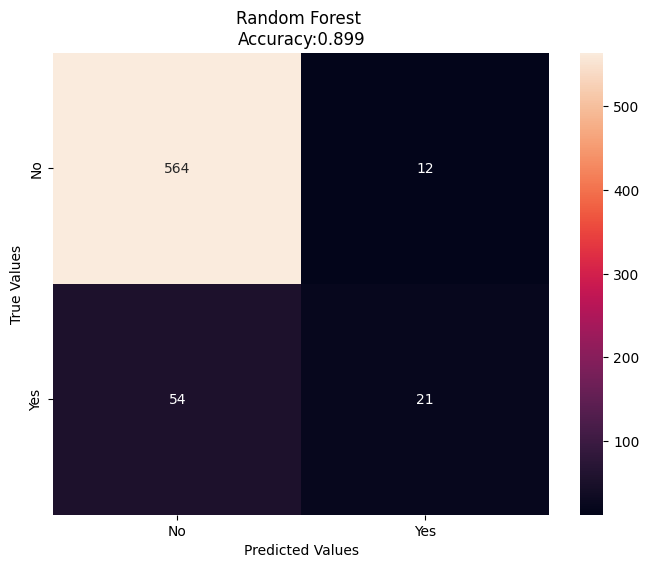

              precision    recall  f1-score   support

          No       0.94      0.91      0.93       576
         Yes       0.44      0.53      0.48        75

    accuracy                           0.87       651
   macro avg       0.69      0.72      0.71       651
weighted avg       0.88      0.87      0.87       651



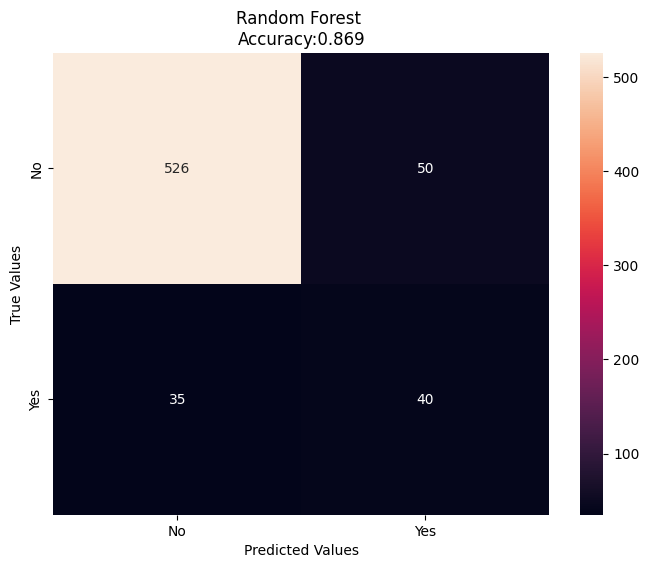

In [54]:
# กิจกรรม 10.2
# Removes Warnings
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.metrics import classification_report, confusion_matrix,\
                            accuracy_score
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler 

bank = pd.read_csv('data/bank.csv', sep = ';')
bank.head()

bank = bank.rename(columns={'y': 'Target'})
bank['Target']=bank['Target'].replace({'no': 0, 'yes': 1})
bank.shape
bank.isnull().values.any()
bank.describe()
bank.describe(include=['O'])

bank['Target'].value_counts(0)

bank["job"] = bank["job"].astype('category').cat.codes
bank["marital"] = bank["marital"].astype('category').cat.codes
bank["default"] = bank["job"].astype('category').cat.codes
bank["housing"] = bank["marital"].astype('category').cat.codes
bank["loan"] = bank["loan"].astype('category').cat.codes
bank["contact"] = bank["contact"].astype('category').cat.codes
bank["poutcome"] = bank["poutcome"].astype('category').cat.codes

bank['education']=bank['education'].replace({'primary': 0,
                                             'secondary': 1,
                                             'tertiary':2})  

bank['month'].replace(['jan','feb','mar','apr','may','jun','jul',
                       'aug','sep','oct','nov','dec'],
                      [1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
bank.head()

target = 'Target'
X = bank.drop(['Target'], axis=1)
y=bank[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.15,
                                                    random_state=1,
                                                    stratify=y)
y_train.value_counts()
y_test.value_counts()

standard_scalar = StandardScaler()
X_train_sc = standard_scalar.fit_transform(X_train)
X_test_sc = standard_scalar.transform(X_test)

clf_random=RandomForestClassifier(n_estimators=20,max_depth=None,
                                  min_samples_split=7,random_state=0)

clf_random.fit(X_train_sc,y_train)
y_pred=clf_random.predict(X_test_sc)

target_names = ['No', 'Yes']
print(classification_report(y_test,y_pred,target_names=target_names))

cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,index=['No','Yes'], columns=['No','Yes'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
          .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

standard_scalar = StandardScaler()
X_train_sc_resampled = standard_scalar.fit_transform(X_resampled)
X_test_sc = standard_scalar.transform(X_test)

clf_random.fit(X_train_sc_resampled,y_resampled)

y_pred=clf_random.predict(X_test_sc)

target_names = ['No', 'Yes']
print(classification_report(y_test,y_pred,target_names=target_names))

cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm, index=['No','Yes'], columns=['No','Yes'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
          .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()